

filtered_df = df[(df['Year'] >= 2010) & (df['Year'] <= 2017) & (df['Country'] == 'Turkey')]

In [303]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [304]:
df_original = pd.read_csv("Journals.csv")
df = df_original

#Description
Subscriptions to economics journals at US libraries, for the year 2000 
(2000 yılı için ABD kütüphanelerindeki ekonomi dergilerine abonelikler)

title     : Journal title. (gazete basligi)

publisher : factor with publisher name. (yayimci adi ve faktor)

society   : factor. Is the journal published by a scholarly society? (dergi bilimsel bir topluluk tarafndan mi yaymlaniyor)

price     : Library subscription price. (kütüphane üyelik fiyati)

pages     : Number of pages.

charpp    : Characters per page. (sayfa basina karakter)

citations : Total number of citations.(toplam alinti sayisi)

foundingyear : Year journal was founded. (kurulus yili)

subs      : Number of library subscriptions.(kütüphane aboneliklerinin sayisi)

field     : factor with field description (alan)

In [216]:
df.head()

,Unnamed: 0,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,CE,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    180 non-null    object
 1   title         180 non-null    object
 2   publisher     180 non-null    object
 3   society       180 non-null    object
 4   price         180 non-null    int64 
 5   pages         180 non-null    int64 
 6   charpp        180 non-null    int64 
 7   citations     180 non-null    int64 
 8   foundingyear  180 non-null    int64 
 9   subs          180 non-null    int64 
 10  field         180 non-null    object
dtypes: int64(6), object(5)
memory usage: 15.6+ KB


In [218]:
df.dtypes

Unnamed: 0      object
title           object
publisher       object
society         object
price            int64
pages            int64
charpp           int64
citations        int64
foundingyear     int64
subs             int64
field           object
dtype: object

In [219]:
df.describe()

,price,pages,charpp,citations,foundingyear,subs
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,417.722222,827.744444,3232.700000,647.055556,1966.905556,196.866667
std,385.834596,436.817402,819.358285,1182.373679,25.711484,204.528847
min,20.000000,167.000000,1782.000000,21.000000,1844.000000,2.000000
25%,134.500000,548.750000,2715.000000,97.750000,1962.750000,52.000000
50%,282.000000,693.000000,3010.000000,262.500000,1973.000000,122.500000
75%,540.750000,974.250000,3476.750000,656.000000,1982.250000,268.250000
max,2120.000000,2632.000000,6859.000000,8999.000000,1996.000000,1098.000000


In [220]:
df["publisher"].unique()

array(['Blackwell', 'So Afr ec history assn', 'Kluwer', 'Elsevier',
       'Cambridge Univ Pres', 'MIT', 'Wiley', 'Springer', 'MIT Press',
       'Intnl Atlantic Ec. Soc.', 'Sage', 'Routledge', 'Brookings Inst.',
       'University of Toronto Press', 'Inst of Devel Econ',
       'Academic Press', 'Dekker', 'ANU Press', 'Oxford Univ Press',
       'Heldref', 'LSU Press', 'Carfax', 'Mohr Siebeck', 'M.E Sharpe',
       'Duke Univ Press', 'Ec. Society of Australia',
       'Int Assn for Res in I & W', 'Am. Risk & Ins. Assn',
       'Agric. Econ. Society', 'George Mason Univ',
       'Helbing & Lichtenhahn', 'LSE and Univ of Bath',
       'Assn Ev. Economics', 'Univ Wash Press', 'Frank Cass',
       'Population Council', 'Georgia State Univ', 'National Tax Assn.',
       'Oxford Univ. Press', 'Univ of Chicago Press',
       'Southern Econ. Assn', 'Pop Assn America',
       'Univ of Wisconsin Press', 'Ohio State Univ. Press',
       'Am Stat Assn', 'RAND', 'Am Ec Assn', 'Am. Ag. Econ Assn',


In [221]:
df.subs.unique()

array([  14,   59,   17,    2,   96,   15,  202,   46,   57,  125,   30,
         62,   16,   37,  148,  110,   61,   27,   45,   25,  203,  646,
         31,  532,   52,   87,  291,    9,   24,   49,  323,   69,   21,
        212,   38,   22,   77,  290,  386,   50,  144,   48,   33,   29,
         58,   71,  135,  183,  573,  268,  479,   89,   83,   67,  225,
         56,   36,  101,  288,  120,  263,   43,   73,  221,  185,  186,
        199,  165,   95,   82,  214,  152,   81,  137,   98,  163,  462,
         99,   47,  394,  227,   65,  242,  154,   79,   91,  218,   97,
        322,  283,   40,  552,  222,  390,  305,  146,  271,  515,  172,
        127,  524,  385,  413,  366,   75,  238,  142,  437,  269,  643,
        230,  313,  512,  211,  171,   34,  190,  339,  771,  522,  284,
        118,  160,  141,  972,  542,  866,  267,  558,  523,  325,  129,
        531,  231,  536,  487,  799,  660,  737,  346, 1098])

## Examination of missing values

In [222]:
df.isnull().sum()

Unnamed: 0      0
title           0
publisher       0
society         0
price           0
pages           0
charpp          0
citations       0
foundingyear    0
subs            0
field           0
dtype: int64

## Categorical Data

In [223]:
df.head()

,Unnamed: 0,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,CE,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [224]:
categoric_df = df.select_dtypes(include=["object"])
categoric_df.head()

,Unnamed: 0,title,publisher,society,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,Economic History
2,CE,Computational Economics,Kluwer,no,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,Interdisciplinary


<AxesSubplot:>

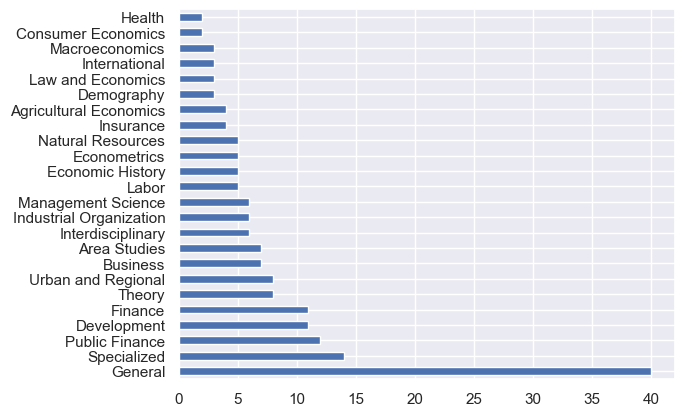

In [225]:
categoric_df["field"].value_counts().plot.barh()

## Numerical Data

In [226]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
numeric_df

,price,pages,charpp,citations,foundingyear,subs
0,123,440,3822,21,1986,14
1,20,309,1782,22,1986,59
2,443,567,2924,22,1987,17
3,276,520,3234,22,1991,2
4,295,791,3024,24,1972,96
...,...,...,...,...,...,...
175,226,2272,3036,3791,1945,799
176,148,1467,2184,4138,1886,660
177,159,1669,2640,6697,1892,737
178,178,1482,2992,7943,1932,346


In [227]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,180.0,417.722222,385.834596,20.0,134.50,282.0,540.75,2120.0
pages,180.0,827.744444,436.817402,167.0,548.75,693.0,974.25,2632.0
charpp,180.0,3232.700000,819.358285,1782.0,2715.00,3010.0,3476.75,6859.0
citations,180.0,647.055556,1182.373679,21.0,97.75,262.5,656.00,8999.0
foundingyear,180.0,1966.905556,25.711484,1844.0,1962.75,1973.0,1982.25,1996.0
subs,180.0,196.866667,204.528847,2.0,52.00,122.5,268.25,1098.0


In [228]:
numeric_df[["price",  "subs"]].describe().T

,count,mean,std,min,25%,50%,75%,max
price,180.0,417.722222,385.834596,20.0,134.5,282.0,540.75,2120.0
subs,180.0,196.866667,204.528847,2.0,52.0,122.5,268.25,1098.0


# outliers

In [229]:
def find_column_outliers(df, column_name):
    column = df[column_name]
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

In [230]:
outliers_price = find_column_outliers(df, "price")
outliers_price
#outliers_rows = df.loc[df['price'] < lower_bound, ['title', 'price']]
#outliers_rows = df[df['price'] < lower_bound][['title', 'price']]

119    1170
127    2120
130    1539
138    1154
149    1234
150    1492
158    1154
159    1450
160    1431
169    1893
170    1400
172    1339
Name: price, dtype: int64

# Distribution Charts

## Examining the frequencies of all columns one by one

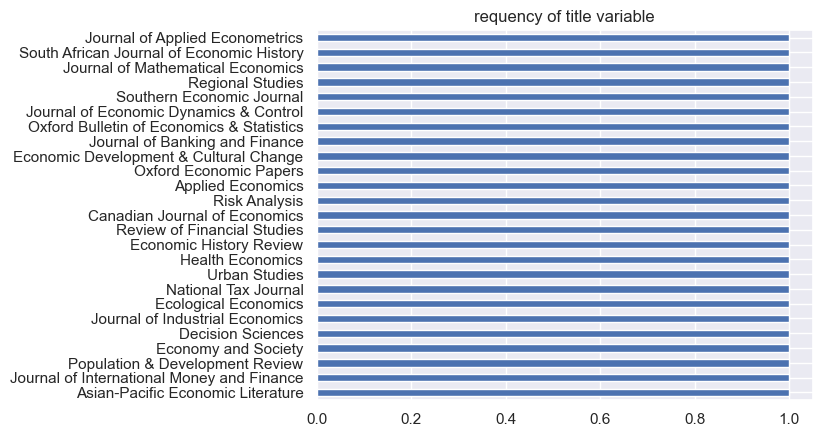

In [231]:
(df["title"]
  .value_counts().head(25)
  .plot.barh()
  .set_title(f"requency of title variable"));


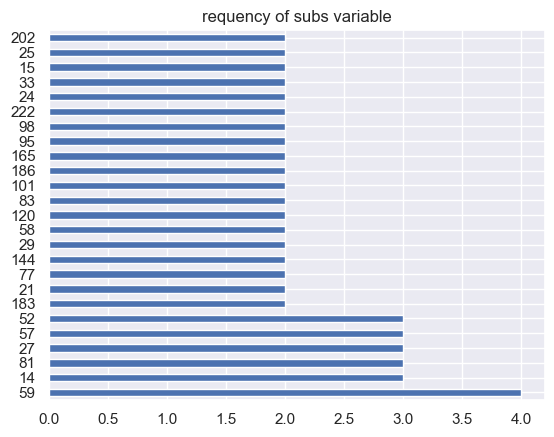

In [232]:
(df["subs"]
  .value_counts().head(25)
  .plot.barh()
  .set_title(f"requency of subs variable"));

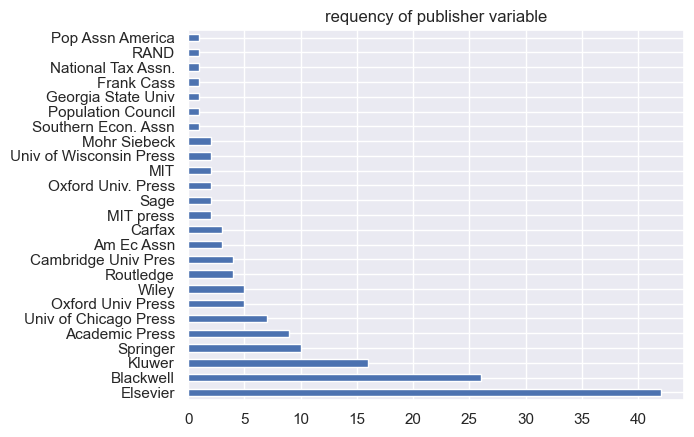

In [233]:
(df["publisher"]
  .value_counts().head(25)
  .plot.barh()
  .set_title(f"requency of publisher variable"));

# bar plot

<AxesSubplot:xlabel='subs'>

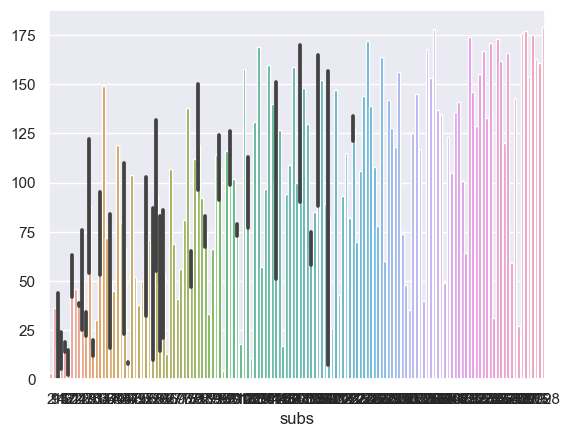

In [234]:
sns.barplot(x="subs", y=df.subs.index, data=df)

<AxesSubplot:xlabel='citations'>

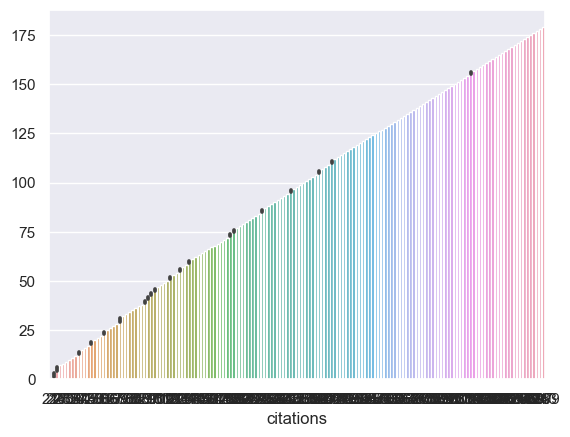

In [235]:
sns.barplot(x= "citations", y= df.citations.index, data= df)

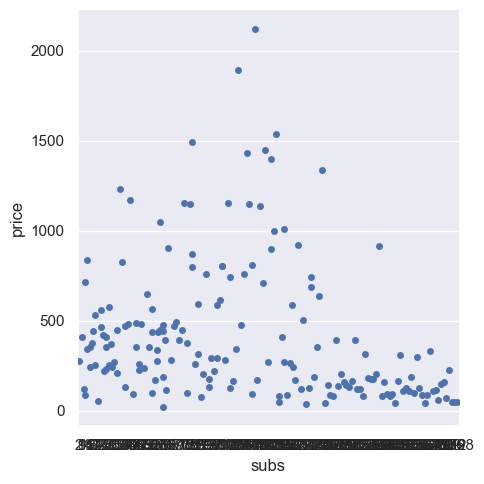

In [236]:
sns.catplot(x="subs",y="price", data=df)

# Capraz Gösterimler

In [237]:
df.head()

,Unnamed: 0,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,CE,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [238]:
df.groupby(["title","subs"])["price"].mean()

title                                                    subs
Agricultural Economics                                   24       558.0
American Economic Review                                 1098      47.0
American Journal of Agricultural Economics               267       81.0
American Journal of Economics & Sociology                573      108.0
Annals of Regional Science                               77       379.0
                                                                  ...  
The World Economy                                        101      805.0
Theory and Decision                                      83       595.0
Urban Studies                                            222      742.0
Weltwirtschaftliches Archiv / Review of World Economics  77        99.0
World Development                                        160     1450.0
Name: price, Length: 180, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


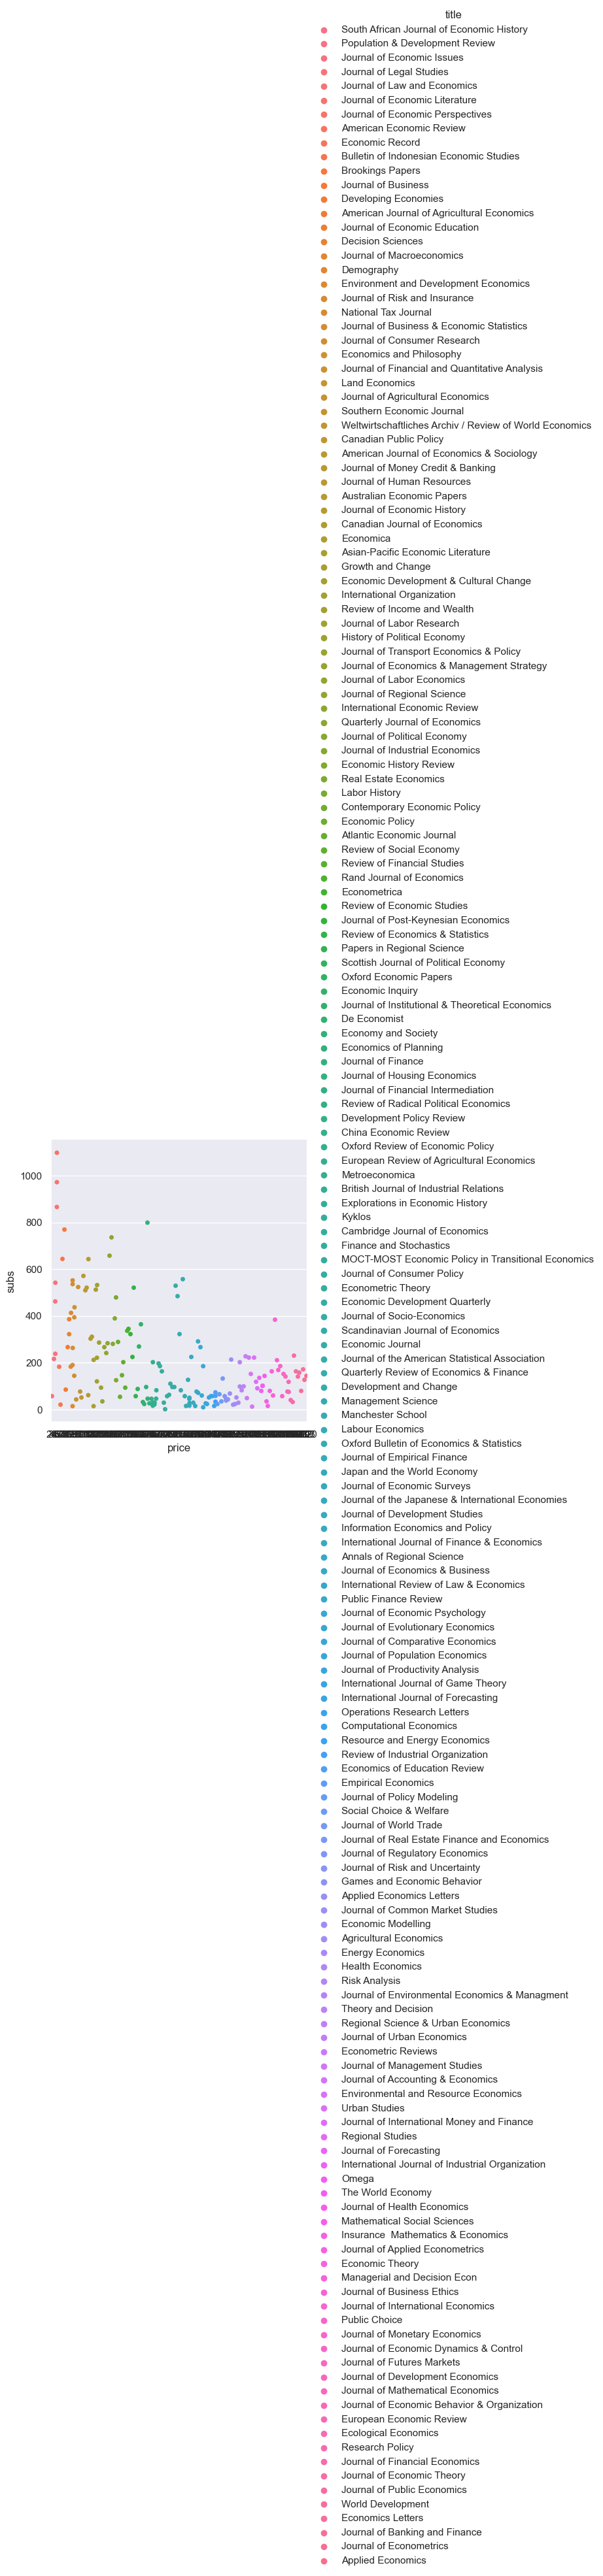

In [239]:
sns.catplot(x = "price", y= "subs",hue= "title",  data= df)

## box plot

<AxesSubplot:xlabel='subs'>

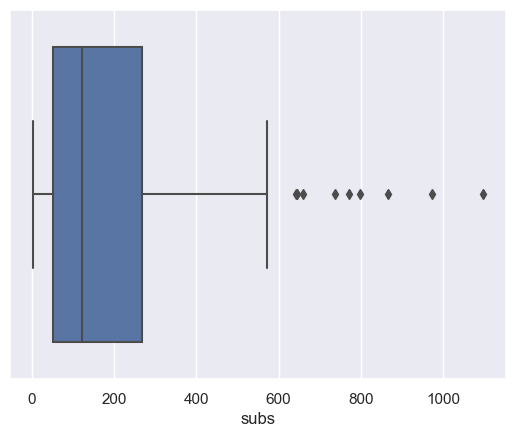

In [240]:
sns.boxplot(x=df["subs"])

### capraz gösterimler

<AxesSubplot:xlabel='price', ylabel='subs'>

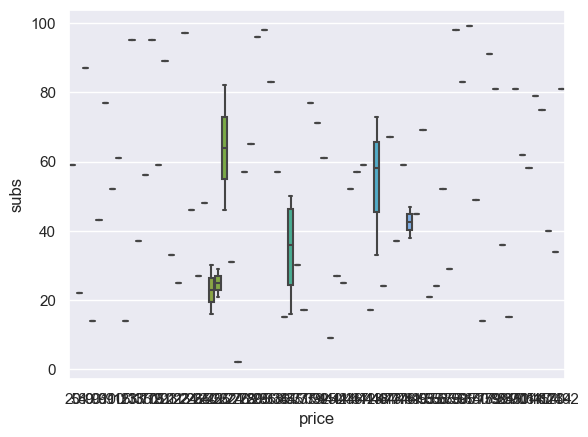

In [241]:
#sns.boxplot(x="price", y="subs", data=df)
filtered_data = df[(df['subs'] >= 0) & (df['subs'] <= 100)]
sns.boxplot(x="price", y="subs", data=filtered_data)

<AxesSubplot:xlabel='pages', ylabel='charpp'>

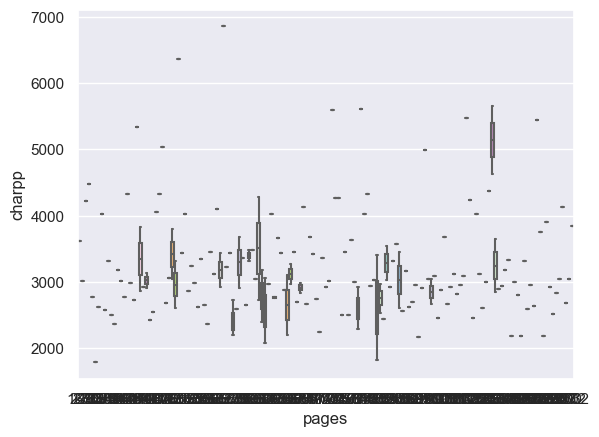

In [242]:
sns.boxplot(y="charpp", x="pages",  data=df,  palette="Set3")

<AxesSubplot:xlabel='subs', ylabel='price'>

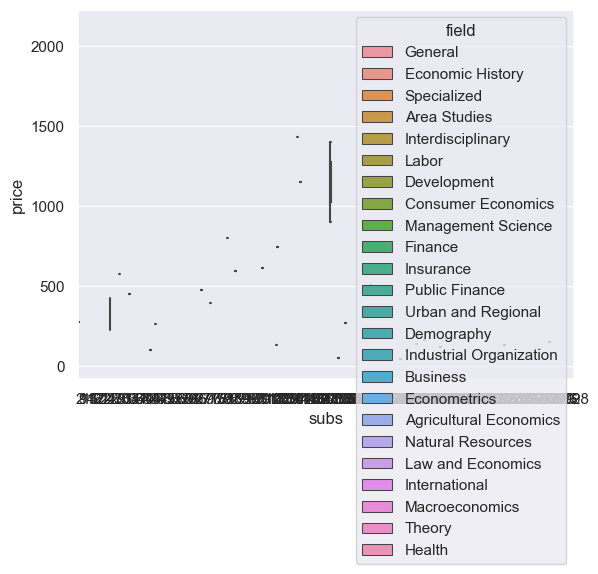

In [243]:
price = df['price'].value_counts().head(5)
subs = df['subs'].value_counts().head(5)
sns.boxplot(x="subs", y="price", hue="field", data=df)

Histogram ve Yogunluk

<AxesSubplot:xlabel='subs', ylabel='Count'>

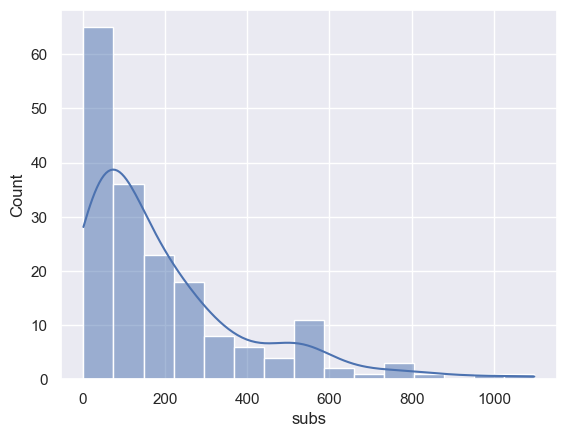

In [244]:
sns.histplot(df.subs, kde=True)

/Users/kenanesmek/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='price', ylabel='Density'>

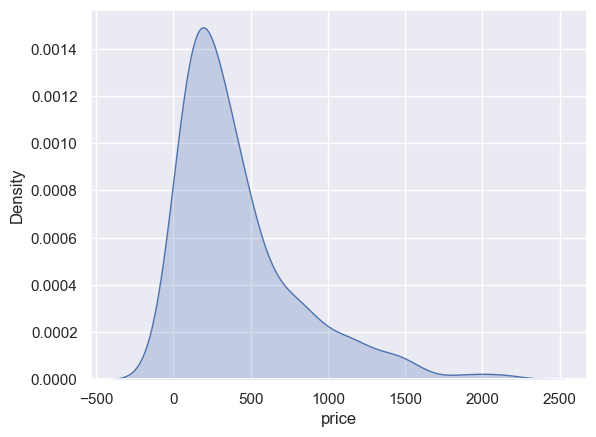

In [245]:
sns.kdeplot(df.price, shade=True)

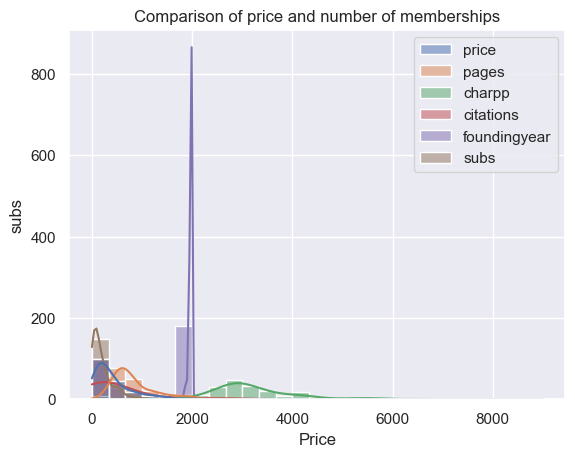

In [246]:
sns.histplot(df, kde = True)
plt.title("Comparison of price and number of memberships")
plt.xlabel("Price")
plt.ylabel("subs")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'schade'
  **contour_kws,


<AxesSubplot:xlabel='foundingyear', ylabel='subs'>

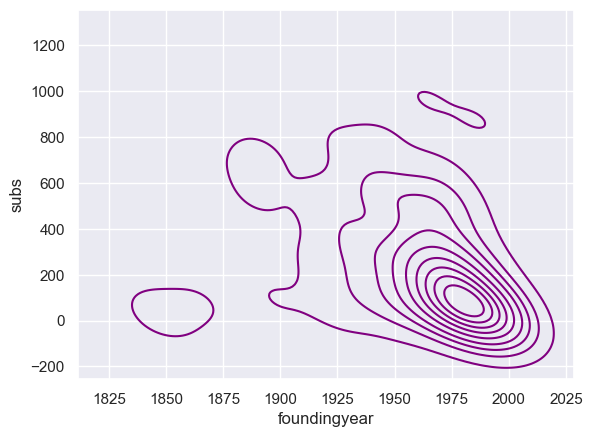

In [254]:
sns.kdeplot(data=df, x="foundingyear",y="subs", schade = True, color = "purple")

### Violin grafikleri (caprazlama grafikleri dahil cizdiriniz)

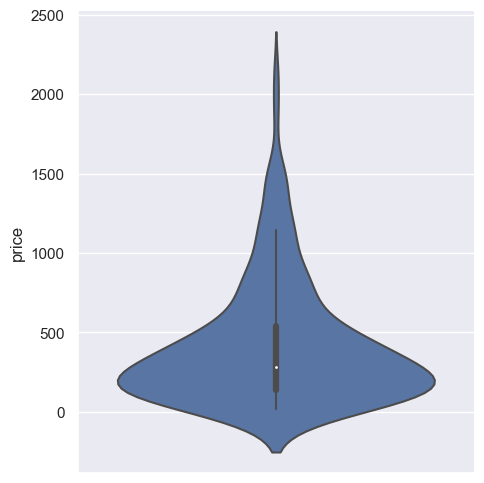

In [247]:
sns.catplot(y= "price", kind= "violin", data= df)

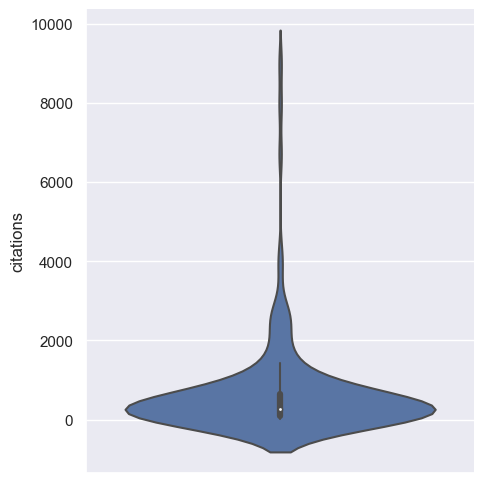

In [248]:
sns.catplot(y= "citations", kind= "violin", data= df)

In [ ]:
# Veri kısıtlaması
lower_bound = 0
upper_bound = 10
filtered_df = df[(df['subs'] >= lower_bound) & (df['subs'] <= upper_bound)]
filtered_df2 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
sns.catplot(x="price", y="subs", kind="violin",  data=df)

In [260]:
df["foundingyear"].unique()

array([1986, 1987, 1991, 1972, 1994, 1995, 1968, 1949, 1978, 1973, 1982,
       1980, 1996, 1992, 1989, 1984, 1961, 1988, 1852, 1943, 1970, 1922,
       1947, 1975, 1963, 1948, 1976, 1981, 1983, 1969, 1964, 1967, 1985,
       1990, 1979, 1941, 1930, 1974, 1960, 1865, 1953, 1925, 1945, 1977,
       1962, 1844, 1898, 1971, 1966, 1958, 1952, 1939, 1932, 1933, 1928,
       1918, 1954, 1919, 1890, 1886, 1892, 1911])

<AxesSubplot:xlabel='foundingyear', ylabel='subs'>

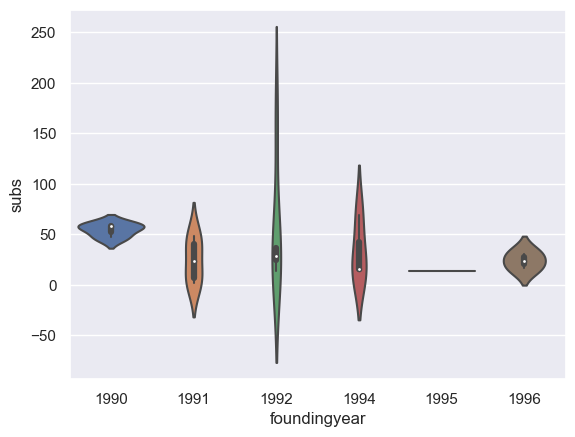

In [282]:
filtered_df = df[(df['foundingyear'] >= 1990)]
sns.violinplot(x="foundingyear", y="subs", data=filtered_df)


## Scatter plot(çaprazlama grafikleri dahil) çizdiriniz


<AxesSubplot:xlabel='subs', ylabel='price'>

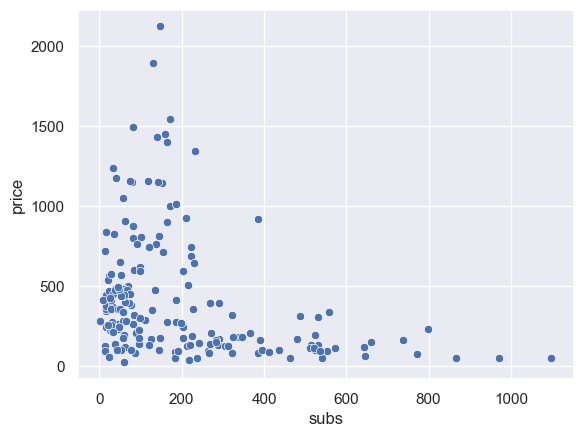

In [283]:
sns.scatterplot(x="subs", y="price", data=df)

<AxesSubplot:xlabel='subs', ylabel='price'>

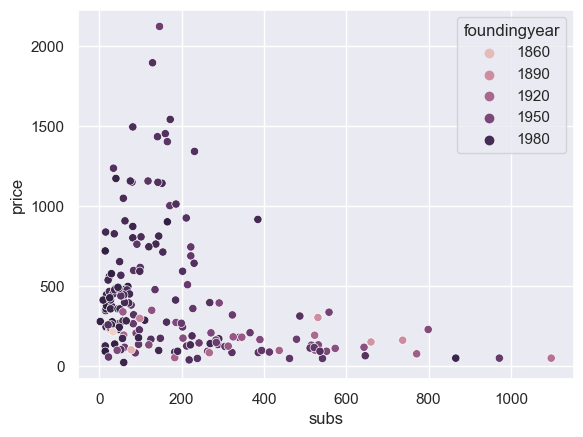

In [286]:
sns.scatterplot(x="subs", y="price", hue="foundingyear", data=df)

sns.scatterplot(x="total_bill", y="tip", hue="day", style="day", data=df)

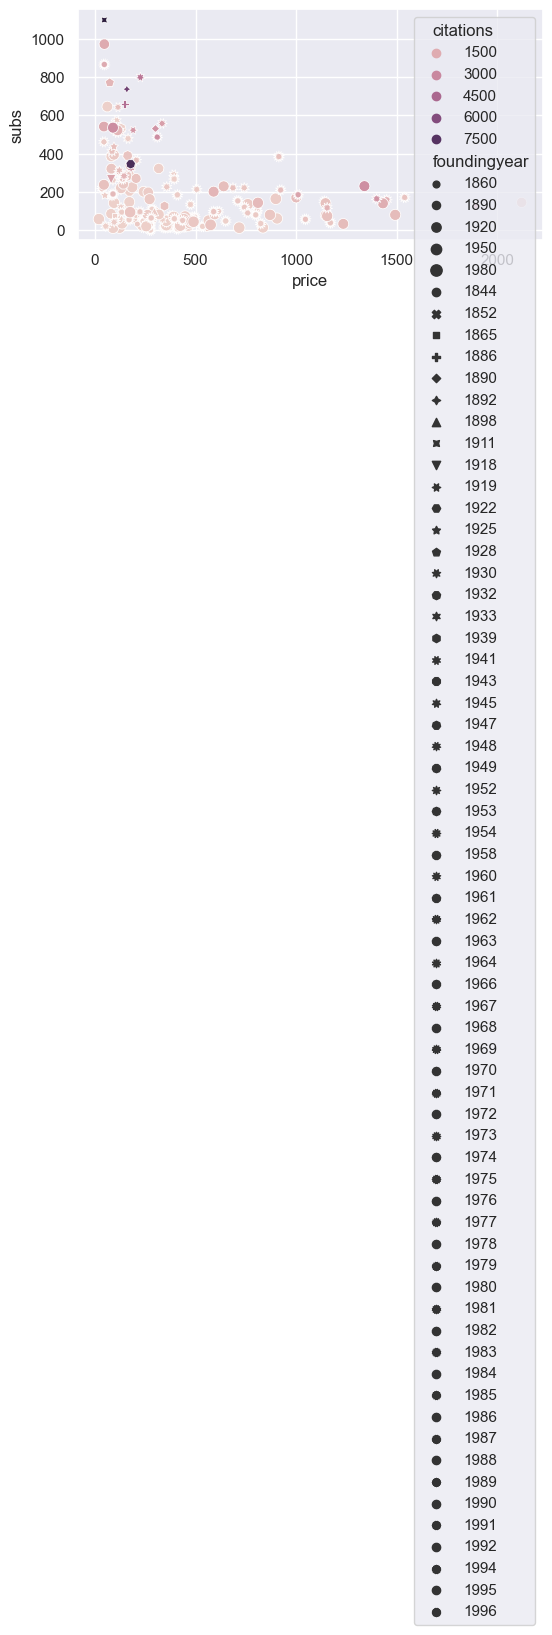

In [292]:
sns.scatterplot(x="price", y ="subs" , hue = "citations" , style = "foundingyear" ,  size="foundingyear", data= df )
plt.gcf().set_size_inches(6, 3)


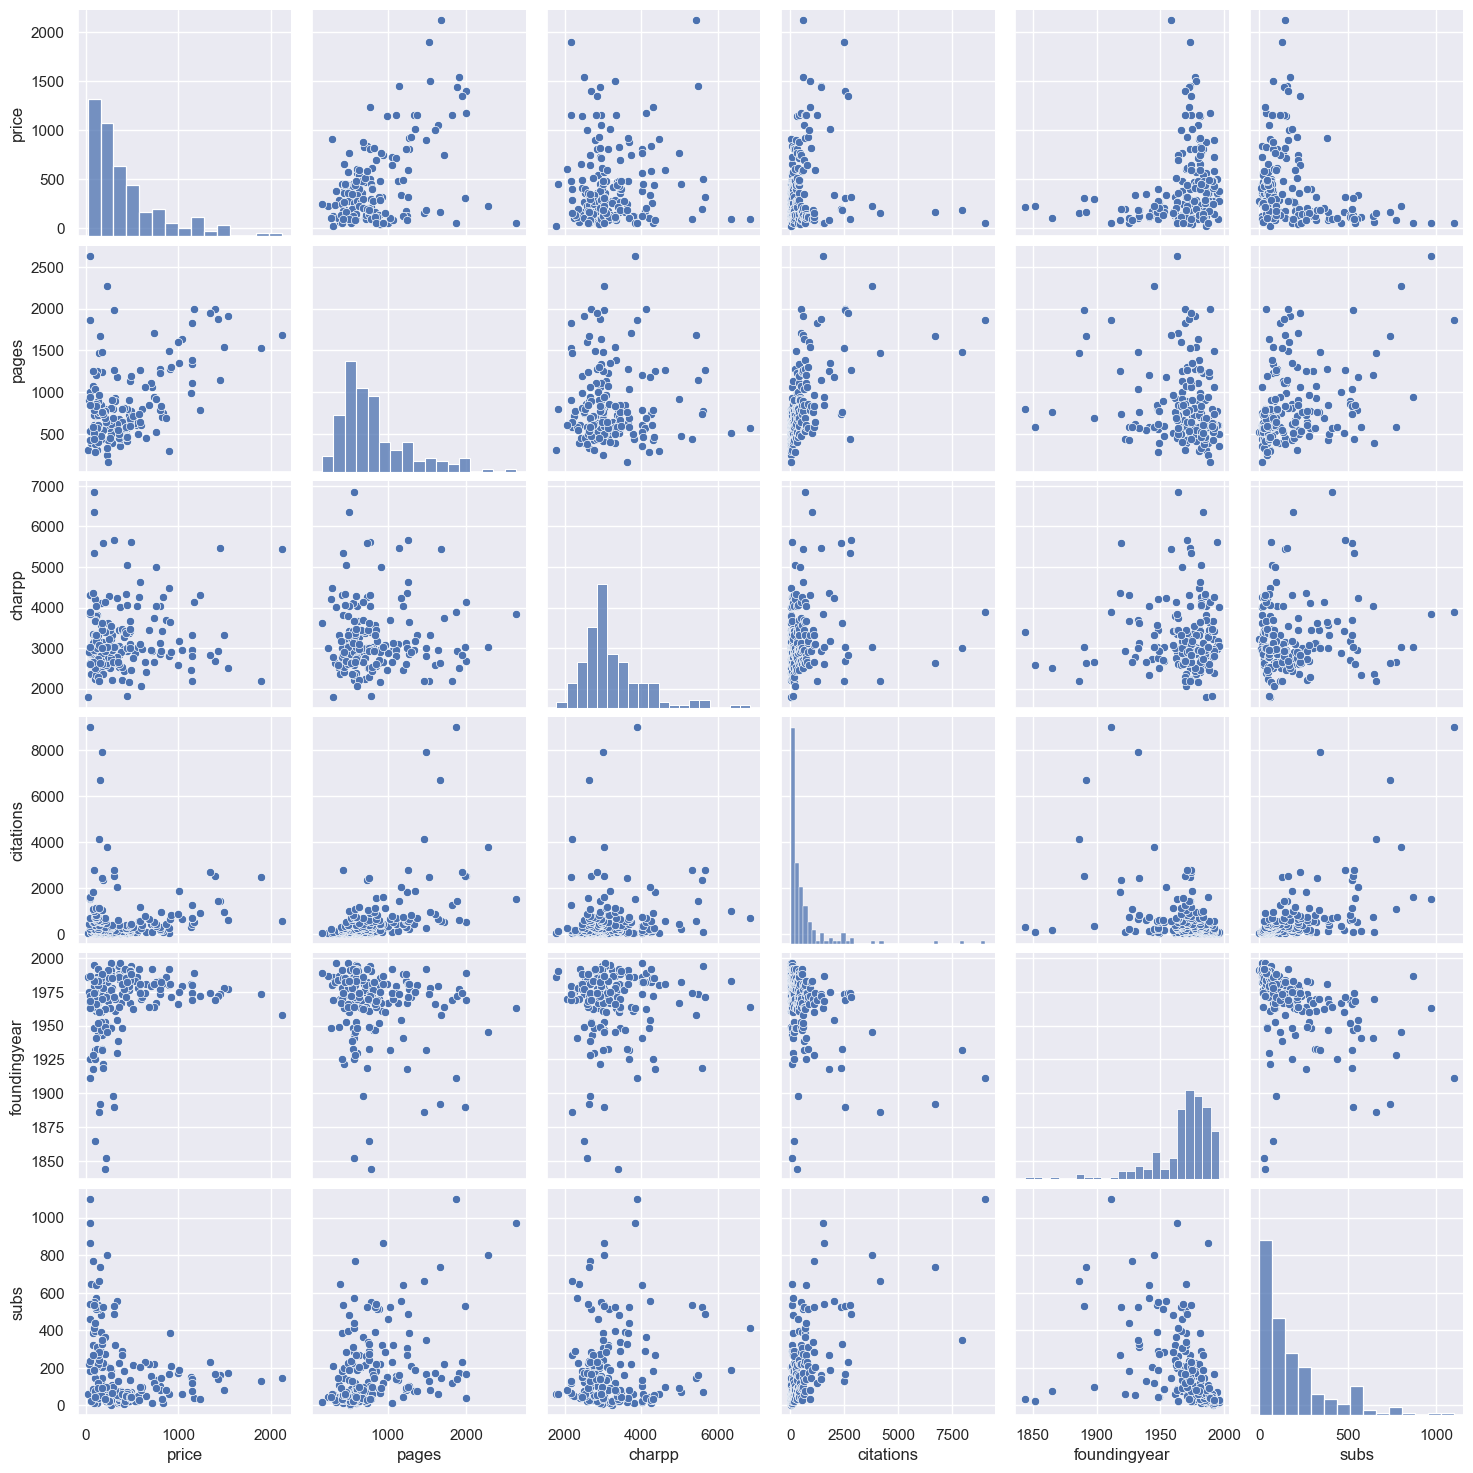

In [293]:
sns.pairplot(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable p

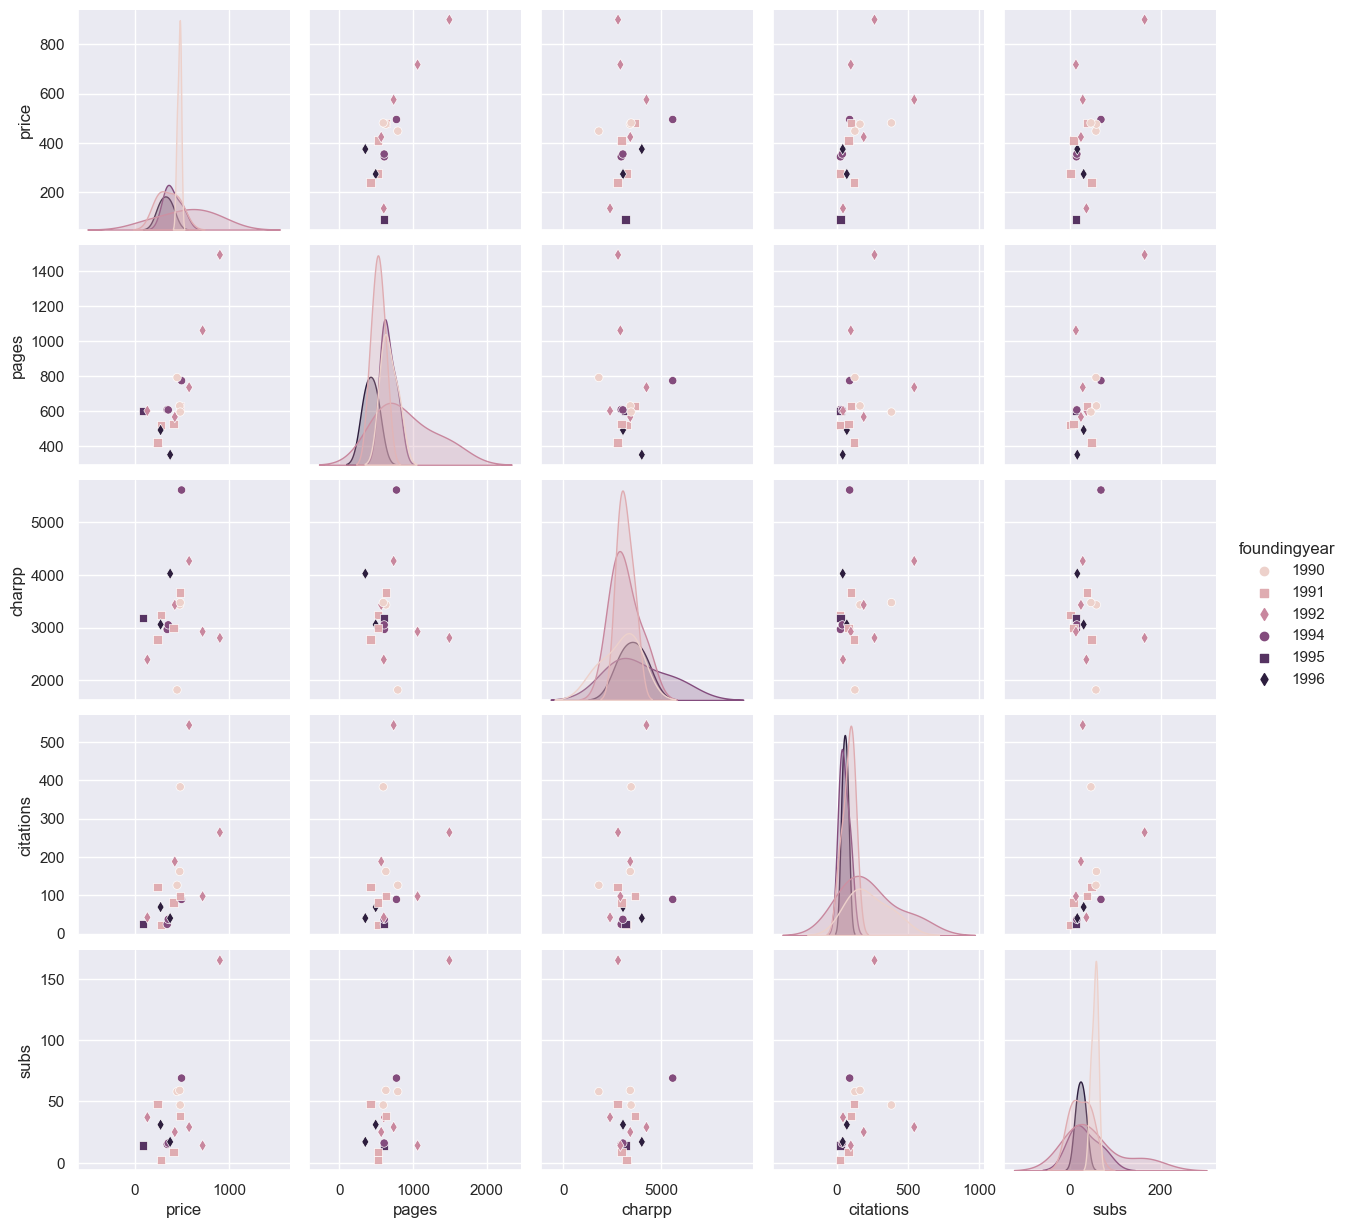

In [299]:
filtered_df = df[(df['foundingyear'] >= 1990)]
sns.pairplot(filtered_df, hue="foundingyear", markers=["o","s","d"])

### Heatmap grafigi çizdiriniz

<AxesSubplot:>

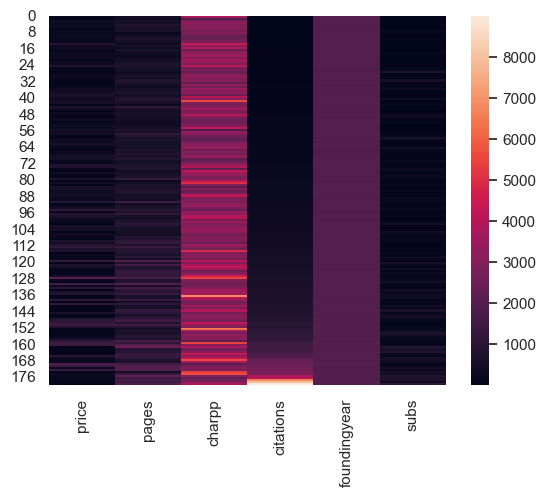

In [306]:
sns.heatmap(numeric_df)

### Çizgi grafik(çaprazlama grafikleri dahil) çizdiriniz

<AxesSubplot:xlabel='foundingyear', ylabel='subs'>

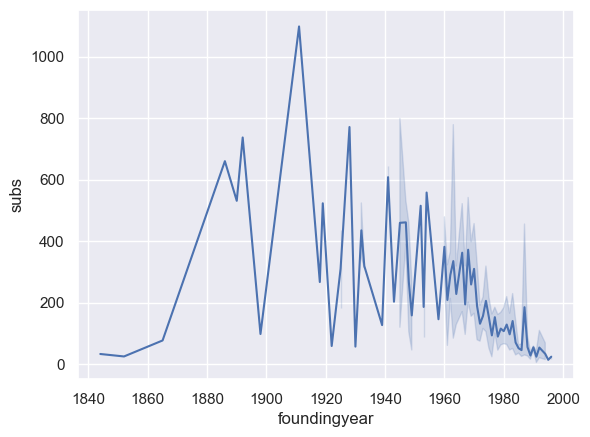

In [309]:
sns.lineplot(x="foundingyear", y="subs", data=df)

<AxesSubplot:xlabel='foundingyear', ylabel='price'>

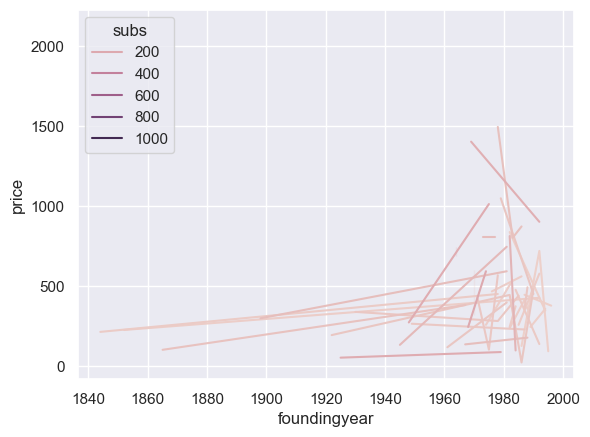

In [311]:
sns.lineplot(x="foundingyear", y="price", hue = "subs" ,data=df)

<AxesSubplot:xlabel='title', ylabel='citations'>

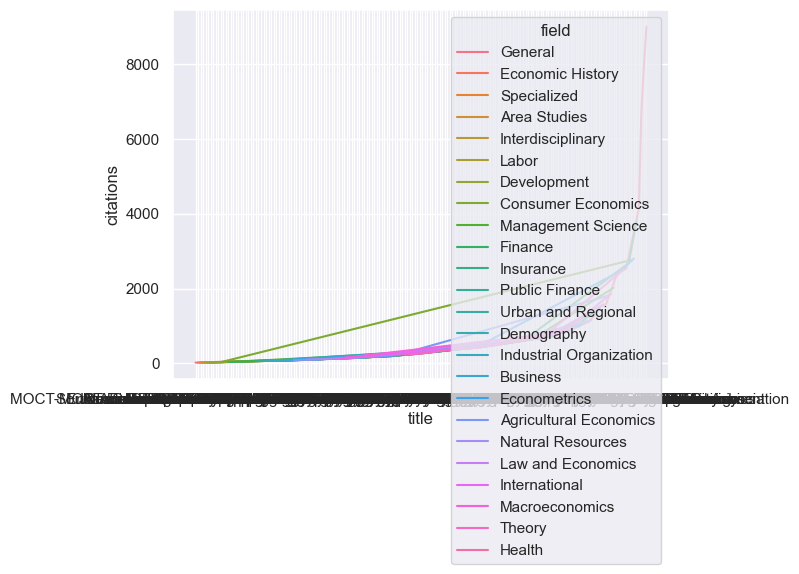

In [312]:
sns.lineplot(x="title", y="citations", hue="field", data=df)